<a href="https://colab.research.google.com/github/agaafra/Machine-Learning-Projects/blob/main/Price_Prediction_of_Used_Cars_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of Used Cars
This project aims to build a model to predict used cars' reasonable prices based on multiple aspects, including vehicle mileage, year of manufacturing, fuel consumption, transmission, road tax, fuel type, and engine size. This model can benefit sellers, buyers, and car manufacturers in the used cars market. Upon completion, it can output a relatively accurate price prediction based on the information that users input.
* [Dataset](https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv)

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

#scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Import Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

## Data Analysis & EDA

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#Rows&Columns
df.shape

(4340, 8)

In [ ]:
#Dimension
df.ndim

2

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## Data Visualization

<Axes: xlabel='fuel', ylabel='selling_price'>

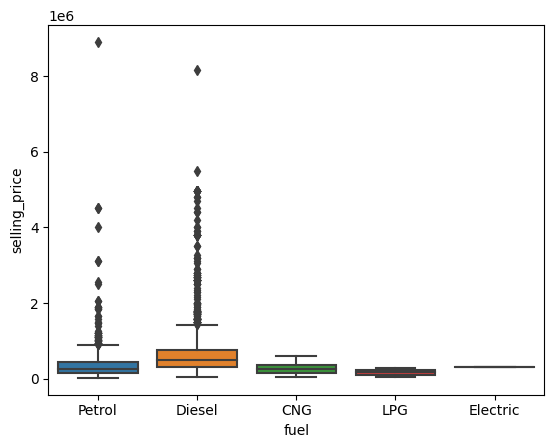

In [ ]:
#Here, I will create a visualization to see which fuel type would cost more.
sns.boxplot(x=df.fuel,y=df.selling_price)

* As seen, Diesel costs the most, followed by Petrol

<Axes: xlabel='year', ylabel='selling_price'>

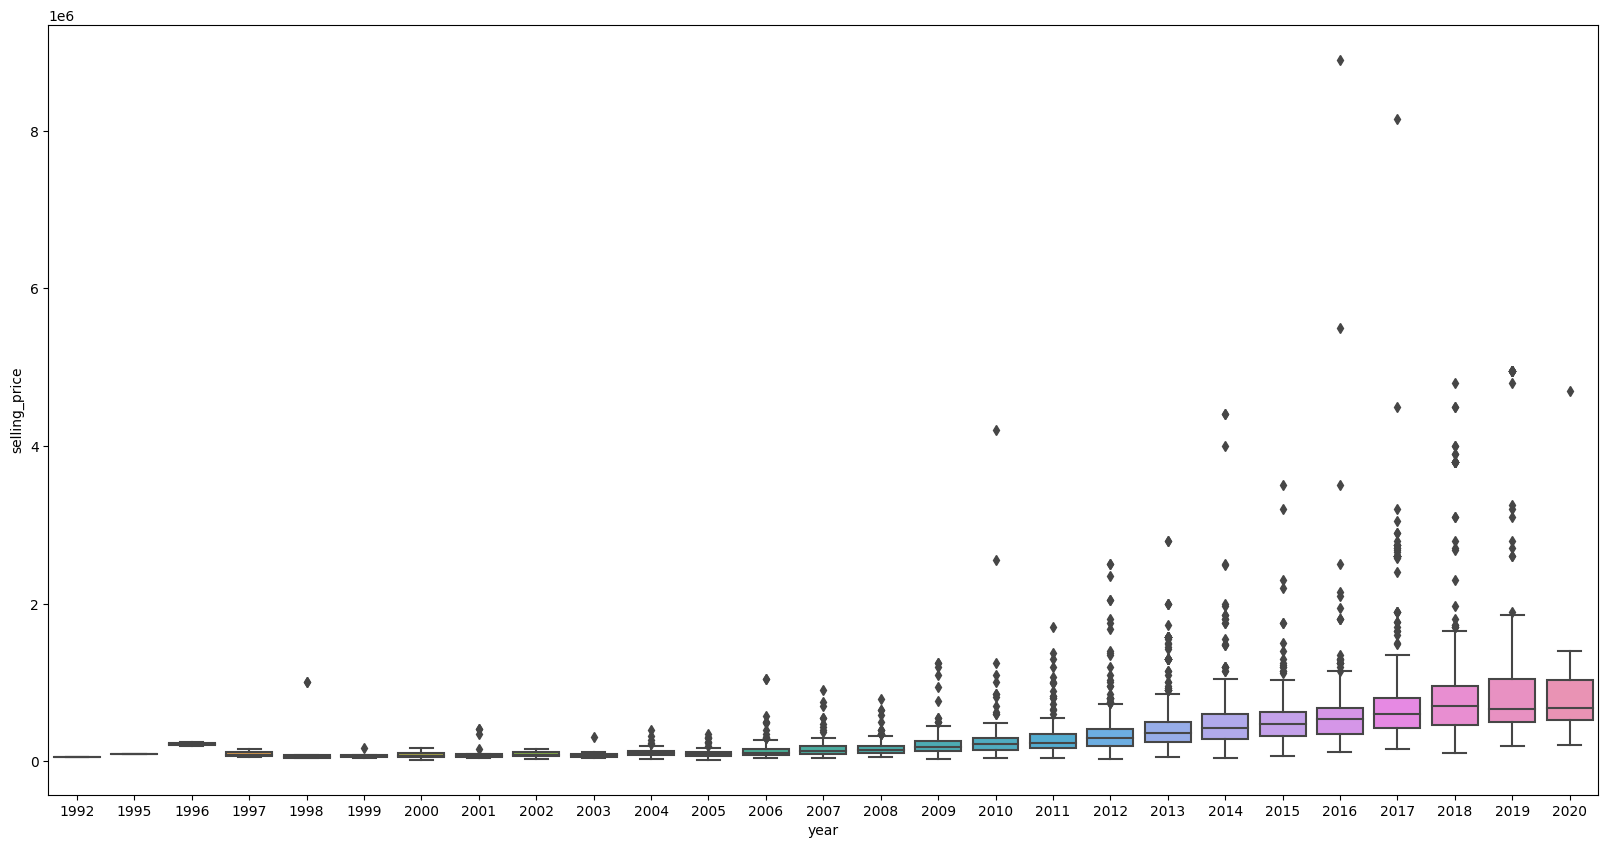

In [ ]:
#Year vs. selling_price
plt.figure(figsize=(20,10))
sns.boxplot(x=df.year, y=df.selling_price)

* Clearly recent years have the highest prices.

<Axes: >

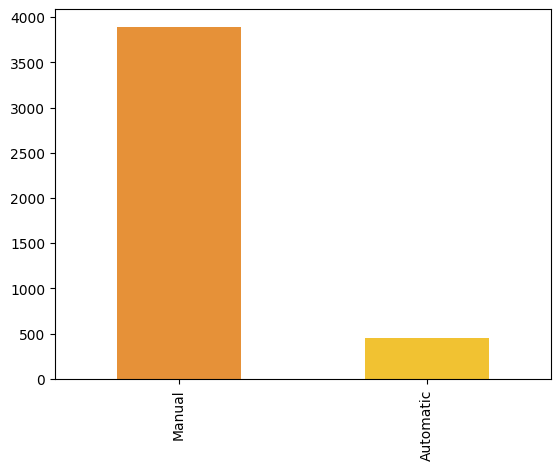

In [ ]:
df.transmission.value_counts().plot.bar(color=('#e69138','#f1c232'))

* Manual cars are more in number compared to automatic

## Data Cleaning and Data Manipulation

### LabelEncoder
* In this step I will use LabelEncoder to encode target labels with value between 0 and n_classes-1

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['fuel']= LabelEncoder().fit_transform(df['fuel'])
df['seller_type']= LabelEncoder().fit_transform(df['seller_type'])
df['transmission']= LabelEncoder().fit_transform(df['transmission'])
df['owner']= LabelEncoder().fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
# Now I will create a new column "no_of_years" which is the difference between the current_year and the year columns
df['current_year'] = 2023
df['no_of_years'] = df.current_year - df.year


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2023,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2023,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2023,11
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2023,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2023,9


In [ ]:
# Next, I will drop the columns ('name','year' and 'current_year') since they are superfluous to this task
# and rename 'selling_price' to 'current selling price'

df.drop(columns=['name','year','current_year'], axis=1, inplace=True)
df.rename(columns={'selling_price':'current_selling_price'}, inplace=True)

In [ ]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,16
1,135000,50000,4,1,1,0,16
2,600000,100000,1,1,1,0,11
3,250000,46000,4,1,1,0,6
4,450000,141000,1,1,1,2,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [ ]:
#Finding the correlation between the features
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

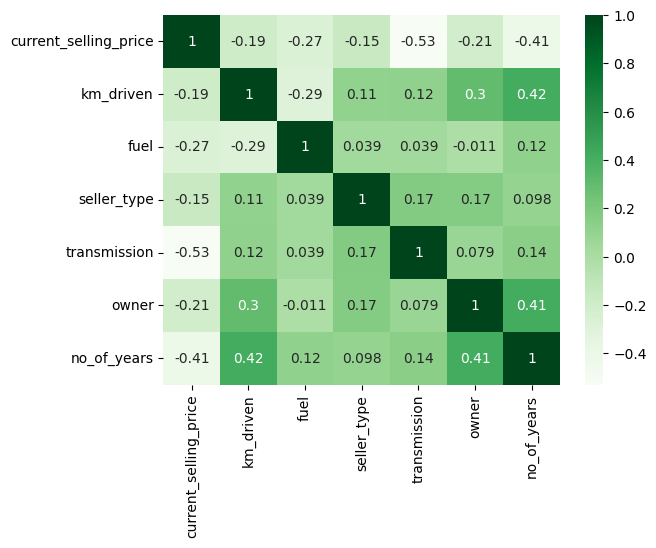

In [ ]:
#Creating a heatmap for the correlation visualization
sns.heatmap(df.corr(),annot=True, cmap='Greens')

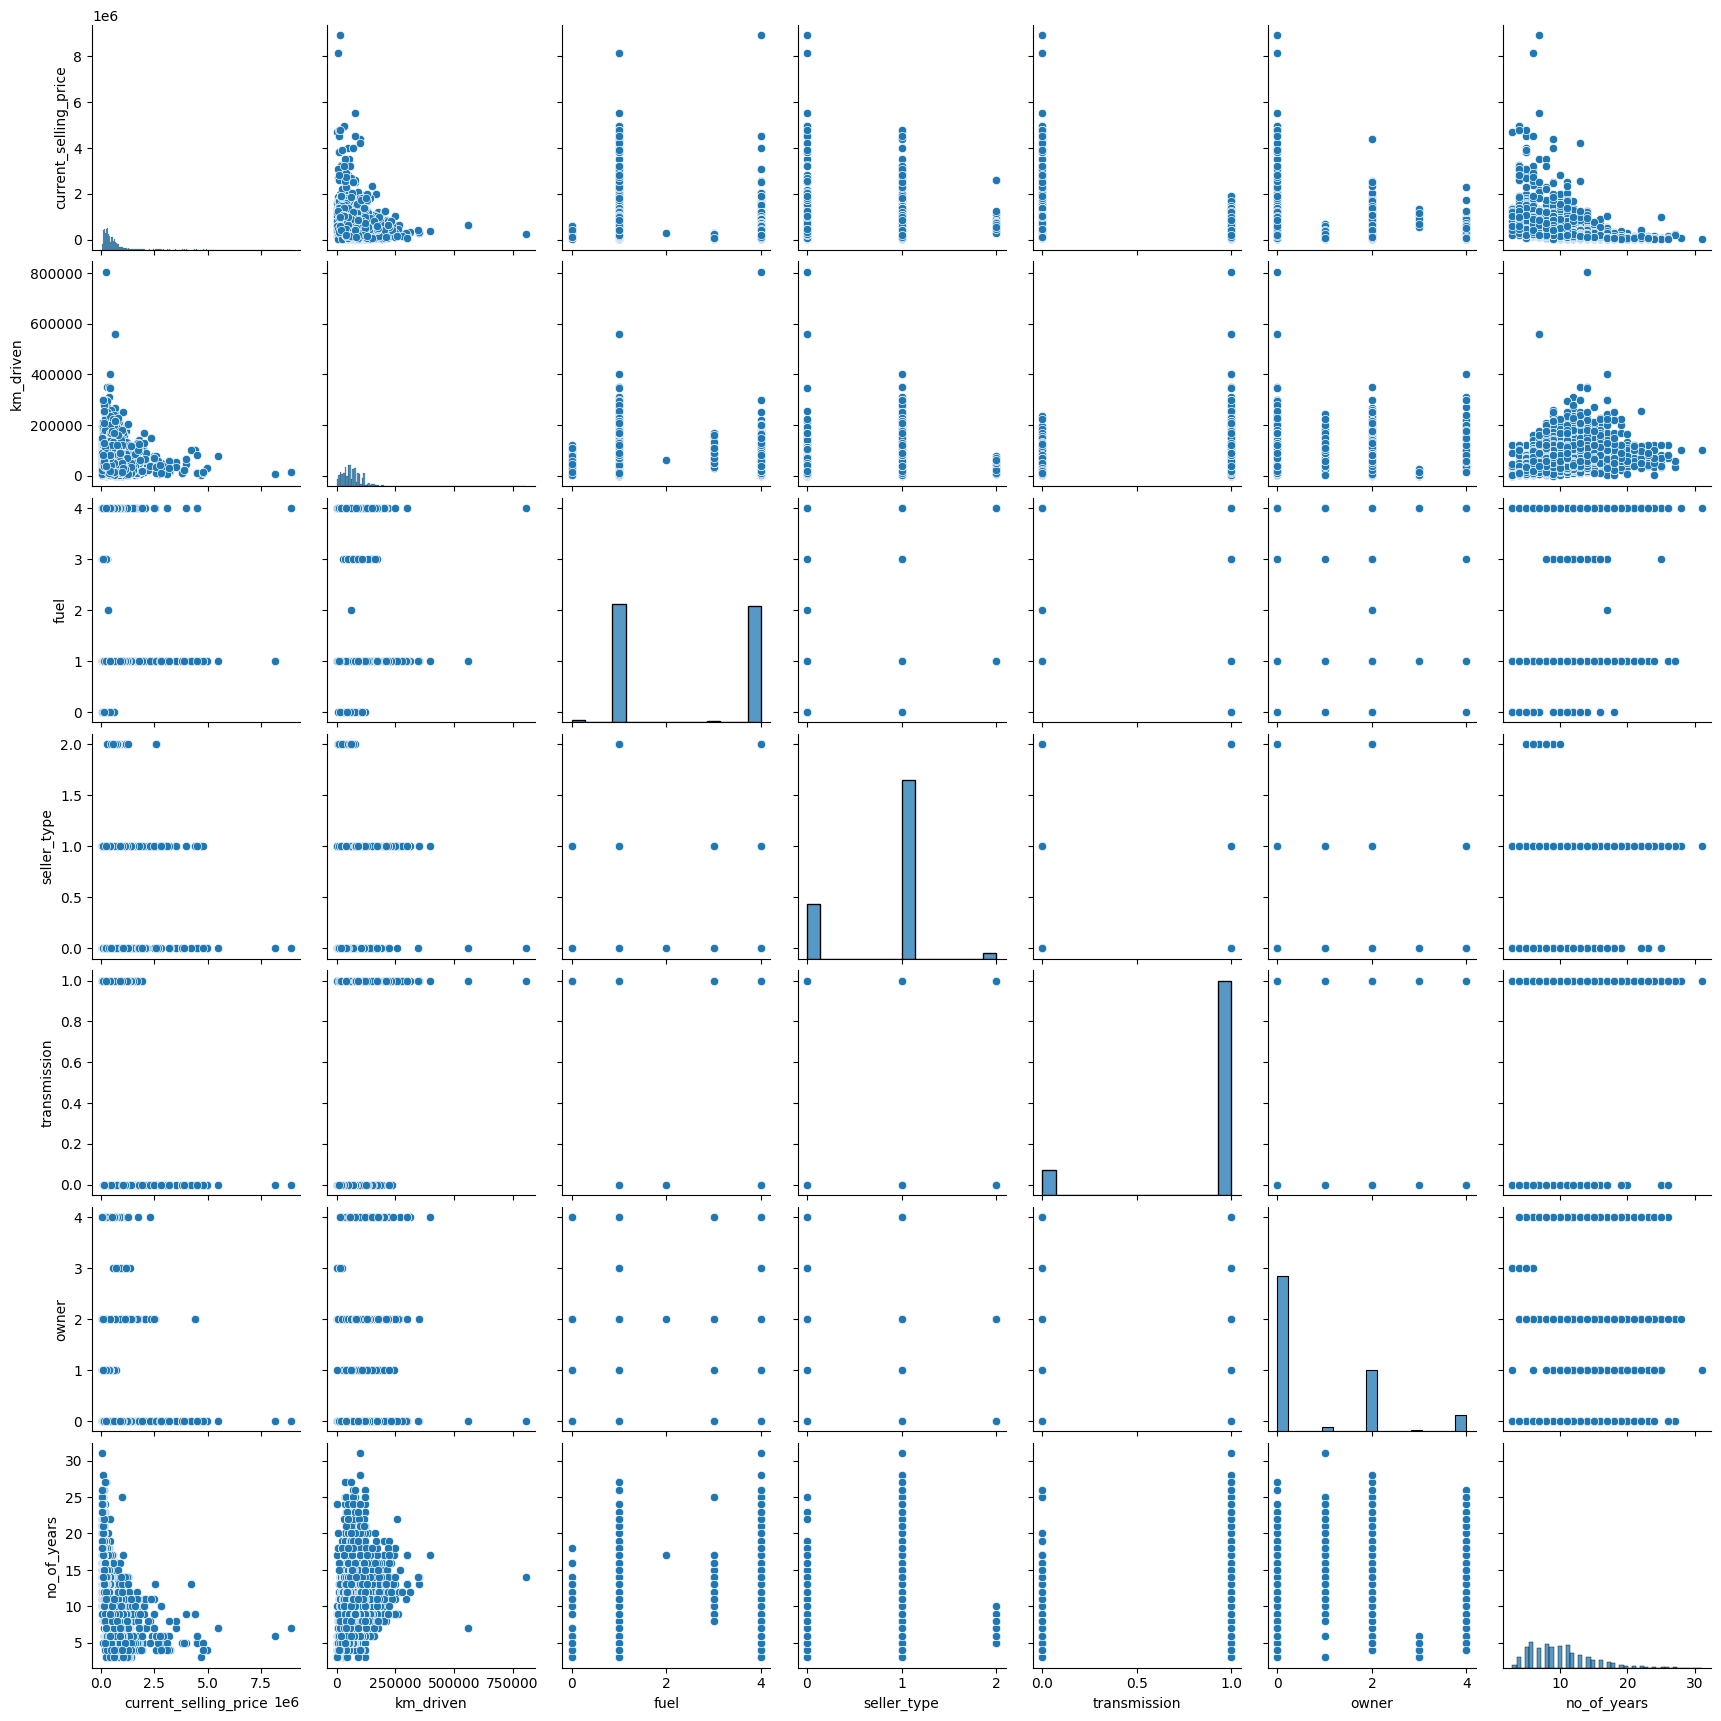

In [ ]:
#Plot pairwise relationships in a dataset using seaborn.pairplot, in order to get a better view at the relationships

sns.pairplot(df)

<Axes: >

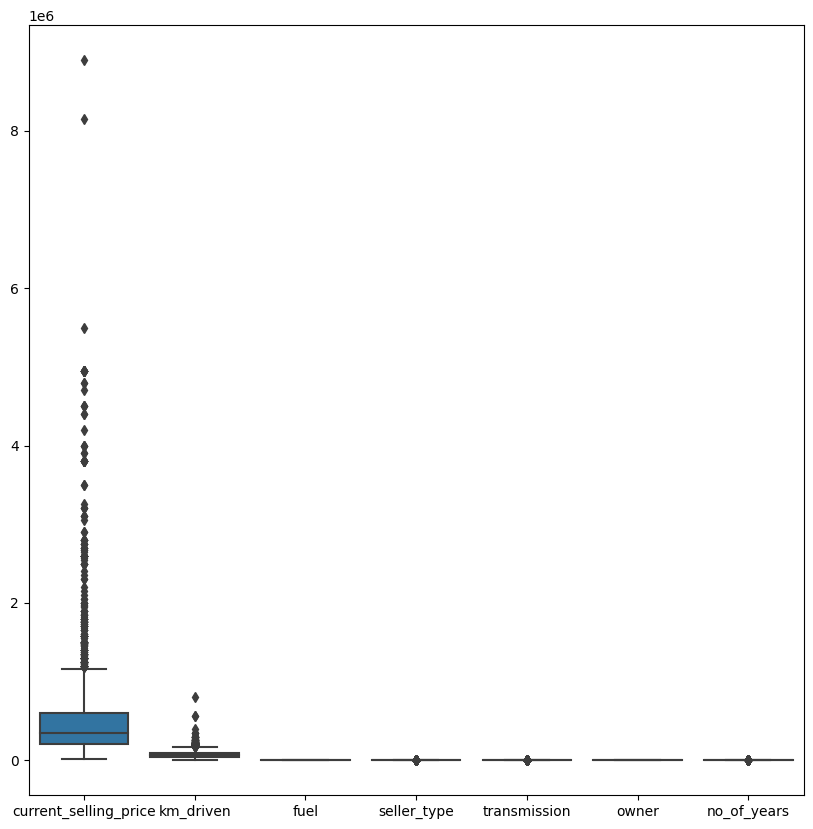

In [ ]:
#I will now creat a boxplot to find any outliers
plt.figure(figsize=(10,10))
sns.boxplot(df)

## Machine Learning

### Selection of Features and Targets

In [ ]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

In [ ]:
X.shape

(4340, 6)

In [ ]:
y.shape

(4340,)

### Splitting the Data

In [ ]:
# Here I will use a train:test ratio of 80:20 to get the best results
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(y_train)

3472

###Choosing the model

In [ ]:
#Here I will using the DecisionTreeRegressor as the model
regressor = DecisionTreeRegressor()

###Training the model

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#here I have made a variable named y_pred which will predict the values of our test data.
y_pred= regressor.predict(X_test)

### Testing the model

In [ ]:
target = pd.DataFrame({"Actual":y_test.reshape(-1), "Predicted":y_pred.reshape(-1)})

In [ ]:
target.head()

,Actual,Predicted
0,1500000,355000.000000
1,740000,740000.000000
2,375000,375000.000000
3,295000,300000.000000
4,170000,299166.666667


Text(0, 0.5, 'Predicted')

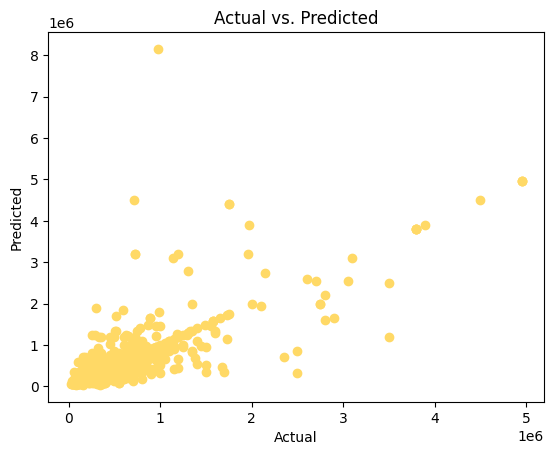

In [ ]:
#Relationship between Actual vs. Predicted
plt.scatter(y_test,y_pred, color='#ffd966')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

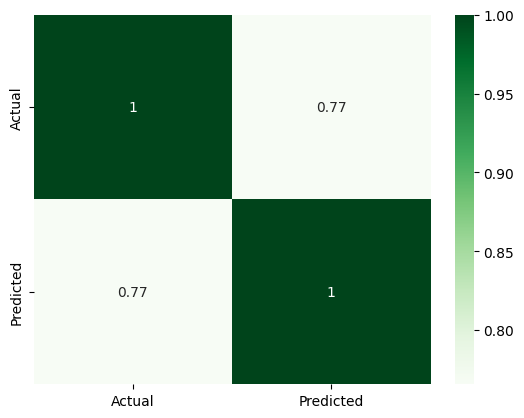

In [ ]:
#Correlation
sns.heatmap(target.corr(), annot=True, cmap='Greens')

###Performance of the model

In [ ]:
print("Accuracy on Traing set: ",regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",regressor.score(X_test,y_test))

Accuracy on Traing set:  0.8782820603757772
Accuracy on Testing set:  0.7772040570927792


* Which is not a weak accuracy

In [ ]:
r2_score(y_test,y_pred)

0.7772040570927792

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error      :  187611.17179025488
Mean Squared  Error      :  227851685337.46875


## Future Improvements


* In order to get better accuracy, I can perform hyperparameter tuning by setiing the parameters manually which maximizes my model's predictive accuracy.